# 0.) Import and Clean data

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [150]:
#drive.mount('/content/gdrive/', force_remount = True)

In [151]:
df = pd.read_csv("bank-additional-full.csv",sep = ";")

In [152]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [153]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [154]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [155]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTENC

In [157]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [158]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

X_scaled = over_X
y_train = over_y

In [159]:
#categorical_features_indices = list(range(3,82))

In [160]:
# smote_nc = SMOTENC(categorical_features=categorical_features_indices,random_state=42)
# X_scaled, y_train = smote_nc.fit_resample(X_scaled, y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [161]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= 249.5\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= 134.5\ngini = 0.378\nsamples = 24128\nvalue = [18034.0, 6094.0]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 0.5\ngini = 0.211\nsamples = 11711\nvalue = [10308, 1403]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.184\nsamples = 11381\nvalue = [10213, 1168]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.41\nsamples = 330\nvalue = [95.0, 235.0]\nclass = Yes'),
 Text(0.375, 0.375, 'month_may <= 0.5\ngini = 0.47\nsamples = 12417\nvalue = [7726, 4691]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.499\nsamples = 9140\nvalue = [4816, 4324]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.199\nsamples = 3277\nvalue = [2910, 367]\nclass = No'),
 Text(0.75, 0.625, 'duration <= 524.5\ngini = 0.402\nsamples = 27032\nvalue = [7546.0, 19486.0]\nclass = Yes'),
 Text(0.625, 0.375, 'contact_telephone <= 0.5\ngini = 0.481\nsamples = 14383\nvalue = [5807, 8576]\nclass =

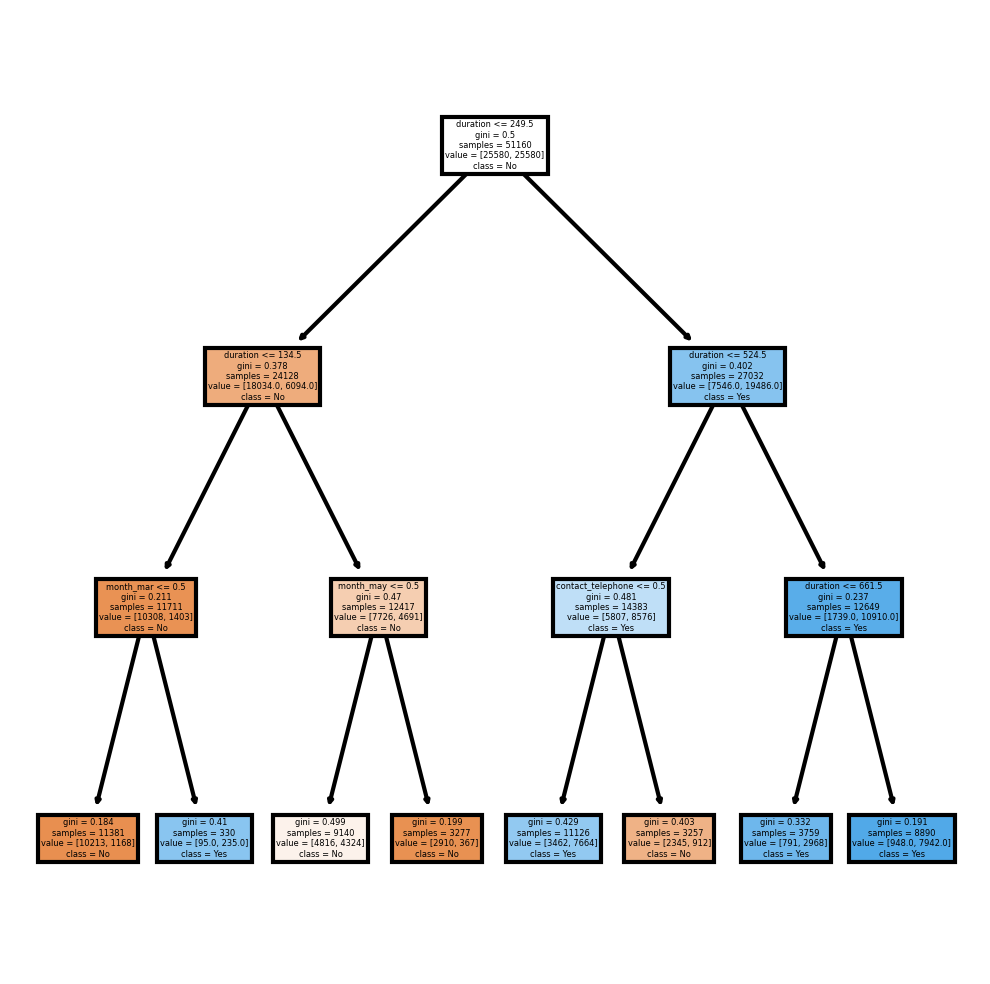

In [162]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree_main, filled = True, feature_names = X.columns, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [163]:
y_pred = dtree_main.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

E:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


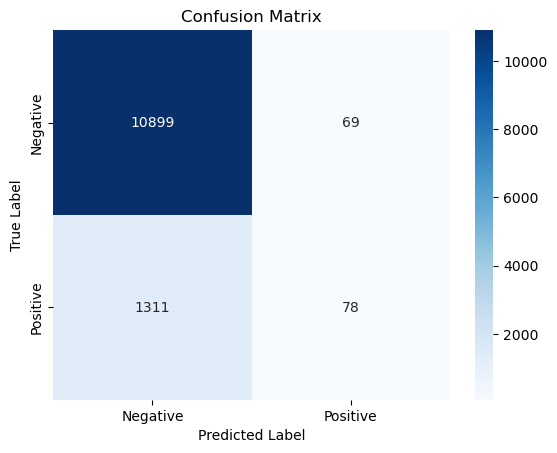

In [164]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [165]:
#placeholder for optimizing max depth
dtree = DecisionTreeClassifier(max_depth = 3)

In [166]:
bagging = BaggingClassifier(estimator = dtree,
                 n_estimators = 100,
                 max_samples = .5,
                 max_features = 1.)

In [167]:
bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

E:\anaconda\Lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


In [168]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

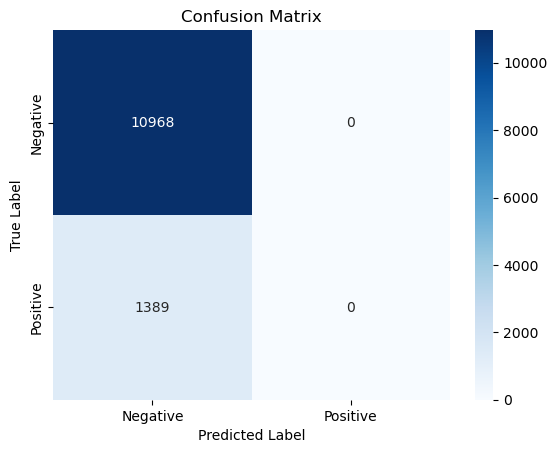

In [169]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [170]:
from sklearn.ensemble import AdaBoostClassifier

In [171]:
dtree = DecisionTreeClassifier(max_depth = 3)


In [172]:
boost = AdaBoostClassifier(estimator = dtree,
                          n_estimators = 100,
                          learning_rate = .1)

In [173]:
boost.fit(X_scaled, y_train)
y_pred = boost.predict(X_test)

E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [174]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

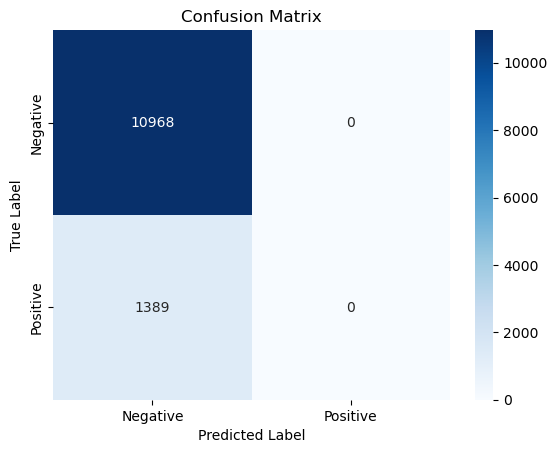

In [175]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 4 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [177]:
base_predictions = [list(dtree_main.predict(X_scaled)),list(boost.predict(X_scaled)),list(bagging.predict(X_scaled))]

In [178]:
super_learner=LogisticRegression()

In [179]:
base_predictions = np.column_stack(base_predictions)

In [180]:
super_learner.fit(base_predictions,y_train)

E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [181]:
# n = len(base_predictions)
# base_predicitions = [np.array(base_predictions)[:,i] for i in range(n)]

In [182]:
super_learner.coef_
#which base learner weighs the most

array([[-0.51630315,  3.05918226,  1.05510324]])